In [92]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [45]:
df=pd.read_csv(r"../data/homeprices.csv")

**Manual Gradient descent**
- y^=wx+b
- w new=w old  -(1/m) *lr (wx+b-y).x
- b new=b old  -(1/m) *lr (wx+b-y)

In [46]:
def gradient_descent(x,y):
    w=0
    b=0
    lr=0.01
    m=len(x)
    sns.scatterplot(x=x,y=y)
    for i  in range(1000):
        h=w*x+b
        plt.plot(x,h)
        erros=h-y
        dyw=1/m *(sum(erros * x))
        dyb=1/m *sum(erros)
        w=w-lr*dyw
        b=b+-lr*dyb 
    print(f'w={w}')
    print(f'b={b}')

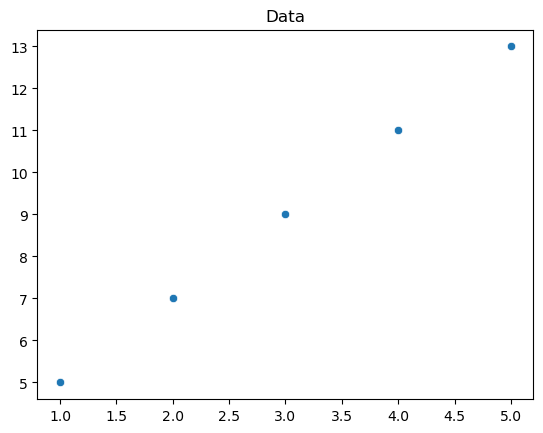

In [47]:
arr1=np.array([1,2,3,4,5])
arr2=np.array([5,7,9,11,13])
sns.scatterplot(x=arr1,y=arr2)
plt.title('Data')
plt.show()

w=2.1158847017304687
b=2.581619456736265


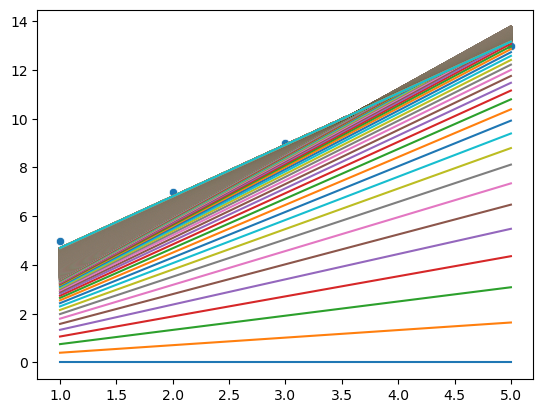

In [48]:
gradient_descent(arr1,arr2)

#### linear Regression model

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
feature=df.drop('price',axis=1)
targert=df['price']

In [51]:
model=LinearRegression()

In [52]:
model.fit(feature,targert)

LinearRegression()

In [53]:
predictions=model.predict(feature)

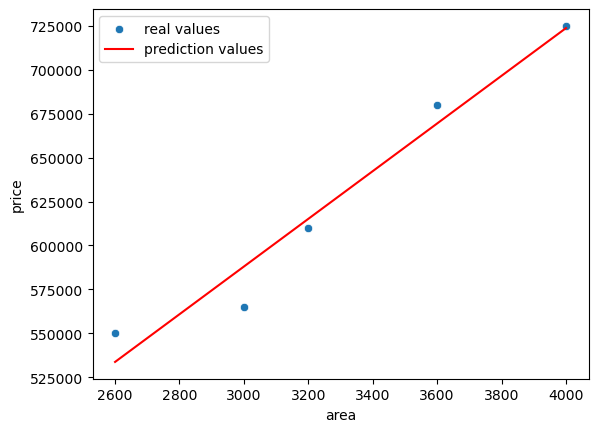

In [54]:
sns.scatterplot(x=df['area'],y=df['price'],label="real values")
plt.plot(feature,predictions,color='r',label="prediction values")
plt.legend()
plt.show()

#### polynomial Regression

In [55]:
data=pd.read_csv('../data/Position_Salaries (1).csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [56]:
data.drop('Position',axis=1,inplace=True)

In [57]:
data

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


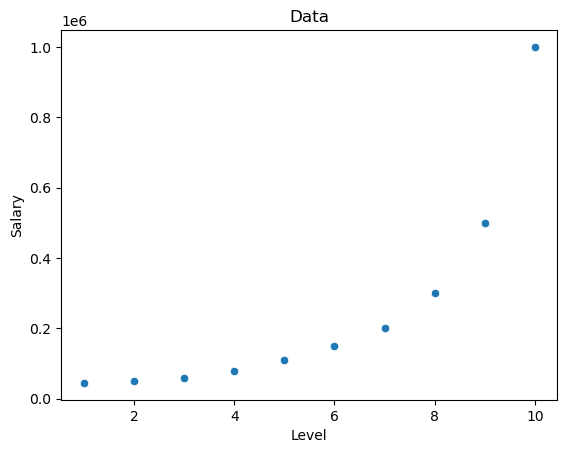

In [58]:
sns.scatterplot(x=data['Level'],y=data['Salary'])
plt.title('Data')
plt.show()

In [59]:
x=data.drop('Salary',axis=1)
y=data['Salary']

In [60]:
model=LinearRegression()

In [61]:
model.fit(x,y)

LinearRegression()

In [62]:
predict_x=model.predict(x)

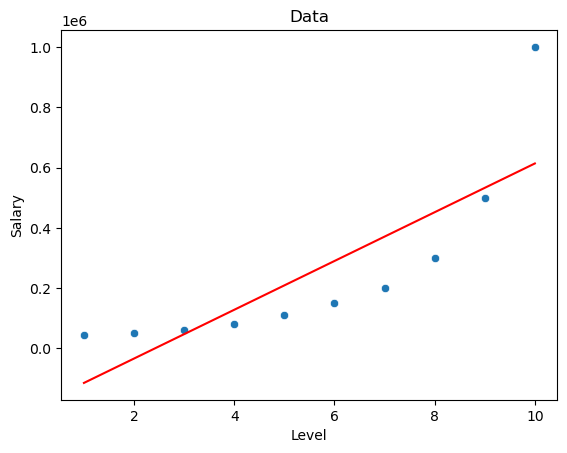

In [63]:
sns.scatterplot(x=data['Level'],y=data['Salary'])
plt.plot(data['Level'],predict_x,color='r')
plt.title('Data')
plt.show()

In [64]:
model.score(x,y)

0.6690412331929895

In [65]:
from sklearn.preprocessing import PolynomialFeatures

In [66]:
p=PolynomialFeatures(degree=5)
x_new=p.fit_transform(x)

In [67]:
model.fit(x_new,y)

LinearRegression()

In [68]:
pred=model.predict(x_new)

In [69]:
model.score(x_new,y)

0.9997969027099755

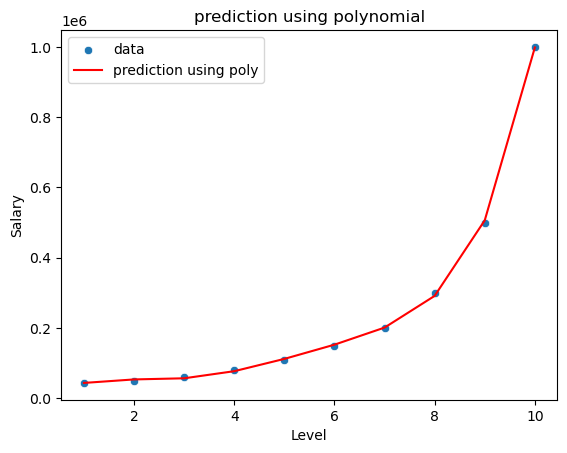

In [70]:
sns.scatterplot(x=data['Level'],y=data['Salary'],label='data')
plt.plot(data['Level'],pred,color='r',label='prediction using poly')
plt.title('prediction using polynomial')
plt.legend()
plt.show()

#### multi variables  Regression

In [71]:
df=pd.read_csv('../data/50Startups.csv')
df.sample(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
37,44069.95,51283.14,197029.42,California,89949.14
35,46014.02,85047.44,205517.64,New York,96479.51
43,15505.73,127382.30,35534.17,New York,69758.98
21,78389.47,153773.43,299737.29,New York,111313.02
16,78013.11,121597.55,264346.06,California,126992.93
41,27892.92,84710.77,164470.71,Florida,77798.83
12,93863.75,127320.38,249839.44,Florida,141585.52
2,153441.51,101145.55,407934.54,Florida,191050.39
19,86419.70,153514.11,0.00,New York,122776.86
23,67532.53,105751.03,304768.73,Florida,108733.99


In [72]:
dummies=pd.get_dummies(df['State'],prefix='state').astype('int')
dummies.head()

,state_California,state_Florida,state_New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [73]:
len(dummies)

50

In [74]:
df=pd.concat([df,dummies],axis=1)
df.drop('State',axis=1,inplace=True)

In [75]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,state_California,state_Florida,state_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


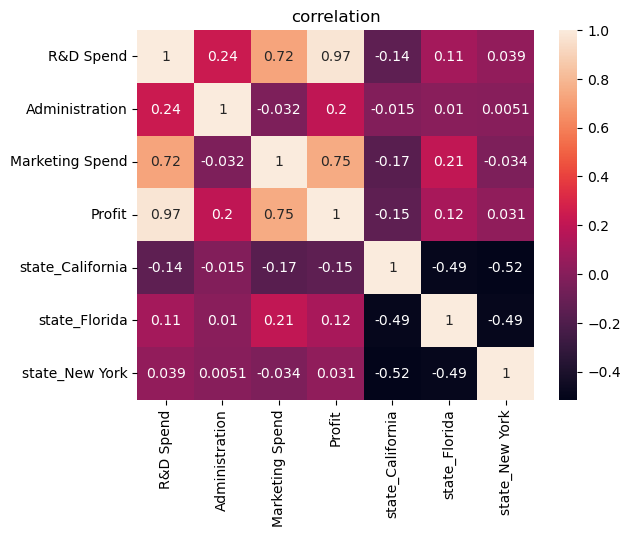

In [76]:
ax=df.corr()
sns.heatmap(ax,annot=True)
plt.title('correlation')
plt.show()

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x=df.drop('Profit',axis=1)
y=df['Profit']

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)

In [80]:
x_test

,R&D Spend,Administration,Marketing Spend,state_California,state_Florida,state_New York
49,0.00,116983.80,45173.06,1,0,0
18,91749.16,114175.79,294919.57,0,1,0
9,123334.88,108679.17,304981.62,1,0,0
14,119943.24,156547.42,256512.92,0,1,0
32,63408.86,129219.61,46085.25,1,0,0
10,101913.08,110594.11,229160.95,0,1,0
8,120542.52,148718.95,311613.29,0,0,1
15,114523.61,122616.84,261776.23,0,0,1
37,44069.95,51283.14,197029.42,1,0,0
7,130298.13,145530.06,323876.68,0,1,0


In [81]:
model=LinearRegression()

In [82]:
model.fit(x_train,y_train)

LinearRegression()

In [83]:
prediction_x=model.predict(x_test)

In [84]:
a=pd.DataFrame(prediction_x,columns=['predictions']).reset_index(drop=True)
b=pd.DataFrame(y_test).reset_index(drop=True)
values=pd.concat([b,a],axis=1)
values

,Profit,predictions
0,14681.40,51612.360976
1,124266.90,130211.729403
2,149759.96,157278.955677
3,132602.65,151585.750888
4,97427.84,102745.200795
5,146121.95,137005.012811
6,152211.77,152670.946942
7,129917.04,147034.795899
8,89949.14,91527.309809
9,155752.60,161615.399054


In [88]:
mean_squared_error(y_test,prediction_x)

225761460.32374144

In [89]:
mean_absolute_error(y_test,prediction_x)

10883.008663129198

In [91]:
model.score(x_test,y_test)

0.8644764021211567

In [93]:
r2_score(y_test,prediction_x)

0.8644764021211567